# BioActivity Data - BioInformatics project
> This is a notebook about a statistics project using Bioactivity dataset

Reference and thanks to [Youtube course](https://www.youtube.com/watch?v=plVLRashaA8&list=PLtqF5YXg7GLlQJUv9XJ3RWdd5VYGwBHrP&index=1) from Data Professor. This notebook will follow the directions given by the Professor and integrate other concepts found elsewhere, possible end use of ML and SHAP algorithms.

## Configurations

In [2]:
! pip install chembl_webresource_client

In [12]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 7.1 MB/s eta 0:00:0000:0100:01


In [4]:
import os

os.chdir("/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/")
os.getcwd()

'/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics'

## Import Libraries

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from scipy.stats import mannwhitneyu

sns.set_theme(style='ticks')

## Download Dataset
> ChEMBL bioactivity data

[Here](https://www.ebi.ac.uk/chembl/) you can find this dataset. Over 2.4M compounds. "It's a database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs."

### Target search for "coronavirus"

In [6]:
target = new_client.target 
target_query = target.search('coronavirus')
targets = pd.DataFrame(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### Target search for "alzheimer"

In [8]:
target_query_alzh = target.search('alzheimer')
targets_alzh = pd.DataFrame(target_query_alzh)
targets_alzh

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


### Select and retrive bioactivity data for SARS coronavirus 3c-like proteinase

In [21]:
selected_target = targets.target_chembl_id[targets["pref_name"] == "SARS coronavirus 3C-like proteinase"]
selected_target.values[0]

'CHEMBL3927'

In [ ]:
# Using only one bioactivity unit IC50, inhibitory concentration at 50% is a low concentration (I think for semplicity or good practice)
# "In order to elicit 50% of the inhibition of a target protein you would need a lower concentration of the drug"

activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target.values[0]).filter(standard_type = "IC50")
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0


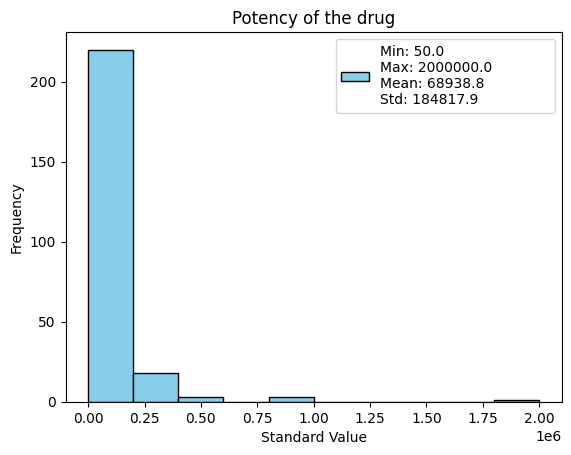

In [ ]:
# standard_value si the potency of the drug, the lower the better the potency of the drug becomes

df["standard_value"].astype(float).plot(kind="hist", 
                                        title="Potency of the drug",
                                        legend=False,
                                        color = "skyblue",
                                        edgecolor = "black")
plt.legend([f'Min: {min(df["standard_value"].astype(float))} \
            \nMax: {max(df["standard_value"].astype(float))} \
            \nMean: {np.mean(df["standard_value"].astype(float)).round(1)} \
            \nStd: {np.std(df["standard_value"].astype(float)).round(1)}'])
plt.xlabel("Standard Value")
plt.ylabel("Frequency")
plt.show()

In [93]:
os.chdir('/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/')
os.makedirs("data/CHEMBL_Bioactivity_Data/", exist_ok=True)

df.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus.csv", index=False)

### Select and retrive bioactivity data for Amyloid-beta A4 protein and Homo sapiens

In [19]:
selected_target_alzh = targets_alzh.target_chembl_id[(targets_alzh["pref_name"] == "Amyloid-beta A4 protein") &
                                                      (targets_alzh["organism"] == "Homo sapiens")]
selected_target_alzh.values[0]

'CHEMBL2487'

In [30]:
res_alzh = activity.filter(target_chembl_id = selected_target_alzh.values[0]).filter(standard_type = "IC50")
df_alzh = pd.DataFrame.from_dict(res_alzh)
df_alzh.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0


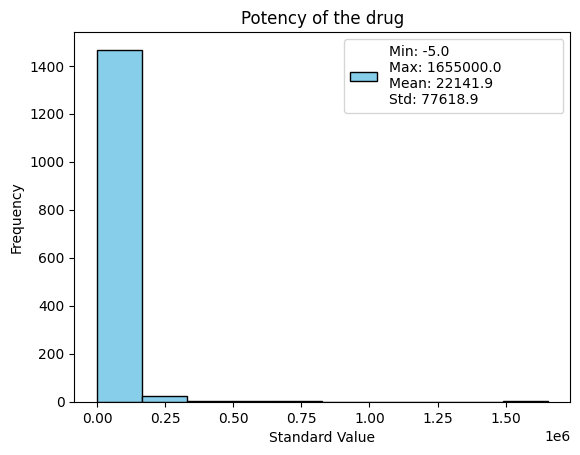

In [78]:
# standard_value si the potency of the drug, the lower the better the potency of the drug becomes

df_alzh["standard_value"].astype(float).plot(kind="hist", 
                                        title="Potency of the drug",
                                        legend=False,
                                        color = "skyblue",
                                        edgecolor = "black")
plt.legend([f'Min: {min(df_alzh["standard_value"].astype(float))} \
            \nMax: {max(df_alzh["standard_value"].astype(float))} \
            \nMean: {np.mean(df_alzh["standard_value"].astype(float)).round(1)} \
            \nStd: {np.std(df_alzh["standard_value"].astype(float)).round(1)}'])
plt.xlabel("Standard Value")
plt.ylabel("Frequency")
plt.show()

In [92]:
os.chdir('/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/')
os.makedirs("data/CHEMBL_Bioactivity_Data/", exist_ok=True)

df_alzh.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer.csv", index=False)

## Pre-Processing and Feature Engineering

### CORONAVIRUS dataset

#### Handling Missing Data for Coronavirus

In [112]:
df = pd.read_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus.csv")
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20
1,NaN,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40
2,NaN,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50
3,NaN,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11
4,NaN,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00


In [113]:
# Check how many NAN values there are for each variable

df.isna().sum()

action_type                  240
activity_comment             245
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      247
assay_variant_mutation       247
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment        216
data_validity_description    216
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency             48
molecule_chembl_id             0
molecule_pref_name           211
parent_molecule_chembl_id      0
pchembl_value                 48
potential_duplicate            0
qudt_units                     2
record_id                      0
relation                       2
src_id                         0
standard_flag                  0
standard_relation              2
standard_t

In [114]:
df['standard_value'].isna().sum()

np.int64(2)

In [115]:
# Drop all NAN values for standard value

df_2 = df[df['standard_value'].notna()]
df_2.shape

(245, 46)

#### Labelling compounds

The three options are:
1. **active**: compounds with standard values (potency) less than 1000 nM
2. **inactive**: compounds with standard values (potency) greater than 10000 nM
3. **intermediate**: compounds with standard values (potency) between 1000 and 10000 nM

In [141]:
def labelling_coumpounds(standard_value):
    if float(standard_value) <= 1000:
        return "active"
    elif float(standard_value) >= 10000:
        return "inactive"
    else:
        return "intermediate"

bioactivity_class = list(df_2['standard_value'].map(labelling_coumpounds))
bioactivity_class[:10]

['intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'intermediate',
 'active',
 'intermediate',
 'active',
 'inactive',
 'inactive']

In [144]:
# molecule_chembl_id is the id for the single compound
# compound is a molecule, a drug or a chemical structure that produces activity on the TARGET protein (CHEMBL3927)
# There could be more than one identical molecule_chembl_id in the dataset, so we keep one of them for semplicity and no redundancy

mol_cid = list(df_2['molecule_chembl_id'].map(lambda x: x))
mol_cid[:10]

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983']

In [146]:
canonical_smiles = list(df_2['canonical_smiles'].map(lambda x: x))
canonical_smiles[:10]

['Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21',
 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21',
 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21',
 'O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21']

In [147]:
standard_value = list(df_2['standard_value'].map(lambda x: x))
standard_value[:10]

[7200.0,
 9400.0,
 13500.0,
 13110.0,
 2000.0,
 980.0,
 4820.0,
 950.0,
 11200.0,
 23500.0]

In [153]:
# Combine the 4 lists into a DF

df_3 = pd.DataFrame(list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value)),
                    columns=["molecule_chembl_id", "canonical_smiles", "bioactivity_class", "standard_value"])
df_3.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0


In [155]:
df_3.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus_preprocessed.csv", index=False)

### ALZHEIMER dataset

#### Handling Missing Data for Alzheimer

In [117]:
df_alzh = pd.read_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer.csv")
df_alzh.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.0
1,NaN,NaN,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.7
2,NaN,NaN,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.8
3,NaN,NaN,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,11.0
4,NaN,NaN,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.0


In [118]:
# Check how many NAN values there are for each variable

df_alzh.isna().sum()

action_type                  1371
activity_comment             1342
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      1720
assay_variant_mutation       1720
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        1668
data_validity_description    1668
document_chembl_id              0
document_journal              157
document_year                   0
ligand_efficiency             487
molecule_chembl_id              0
molecule_pref_name           1551
parent_molecule_chembl_id       0
pchembl_value                 450
potential_duplicate             0
qudt_units                    190
record_id                       0
relation                      222
src_id                          0
standard_flag                   0
standard_relat

In [119]:
df_alzh['standard_value'].isna().sum()

np.int64(222)

In [120]:
# Drop all NAN values for standard value

df_alzh_2 = df_alzh[df_alzh['standard_value'].notna()]
df_alzh_2.shape

(1498, 46)

#### Labelling compounds

The three options are:
1. **active**: compounds with standard values (potency) less than 1000 nM
2. **inactive**: compounds with standard values (potency) greater than 10000 nM
3. **intermediate**: compounds with standard values (potency) between 1000 and 10000 nM

In [143]:
def labelling_coumpounds(standard_value):
    if float(standard_value) <= 1000:
        return "active"
    elif float(standard_value) >= 10000:
        return "inactive"
    else:
        return "intermediate"

bioactivity_class_alzh = list(df_alzh_2['standard_value'].map(labelling_coumpounds))
bioactivity_class_alzh[:10]

['intermediate',
 'intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive']

In [145]:
# molecule_chembl_id is the id for the single compound
# compound is a molecule, a drug or a chemical structure that produces activity on the TARGET protein (CHEMBL2487)
# There could be more than one identical molecule_chembl_id in the dataset, so we keep one of them for semplicity and no redundancy

mol_cid_alzh = list(df_alzh_2['molecule_chembl_id'].map(lambda x: x))
mol_cid_alzh[:10]

['CHEMBL311039',
 'CHEMBL450926',
 'CHEMBL310242',
 'CHEMBL74874',
 'CHEMBL75183',
 'CHEMBL563',
 'CHEMBL196279',
 'CHEMBL195970',
 'CHEMBL195970',
 'CHEMBL264006']

In [148]:
canonical_smiles_alzh = list(df_alzh_2['canonical_smiles'].map(lambda x: x))
canonical_smiles_alzh[:10]

['CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1',
 'CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1']

In [149]:
standard_value_alzh = list(df_alzh_2['standard_value'].map(lambda x: x))
standard_value_alzh[:10]

[5000.0,
 2700.0,
 1800.0,
 11000.0,
 10000.0,
 305000.0,
 75000.0,
 77000.0,
 94000.0,
 21000.0]

In [154]:
# Combine the 4 lists into a DF

df_3_alzh = pd.DataFrame(list(zip(mol_cid_alzh, canonical_smiles_alzh, bioactivity_class_alzh, standard_value_alzh)),
                    columns=["molecule_chembl_id", "canonical_smiles", "bioactivity_class", "standard_value"])
df_3_alzh.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0


In [156]:
df_3_alzh.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer_preprocessed.csv", index=False)

## Exploratory Data Analysis

### Coronavirus case

In [10]:
df_4 = pd.read_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus_preprocessed.csv")

In [16]:
df_4.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0


#### Lipinski descriptors
> Drug Likeness of the compounds based on the Absorption, Distribution, Metabolism and Excretion (ADME)

Lipinski's rule or Rule-of-Five:
- Molecular weight < 500 Dalton
- Octanol-water partion coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [ ]:
# Calculate descriptors

def lipinski(smiles, verbose = False):

    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([
            desc_MolWt,
            desc_MolLogP,
            desc_NumHDonors,
            desc_NumHAcceptors
        ])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i += 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [18]:
df_lipinski = lipinski(df_4['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumADonors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
240,328.466,3.34562,1.0,5.0
241,222.379,-1.99300,1.0,3.0
242,485.559,0.54470,5.0,7.0
243,222.379,-1.99300,1.0,3.0


In [21]:
# Combine data frame preprocessed with Lipinski df

df_combined = pd.concat([df_4, df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumADonors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0


#### Convert IC50 to pIC50
> In order to make the distribution more even (uniform)

It essencially applies a negative logarithmic scale to standard_value column after a multiplication by 10<sup>-9</sup>

In [47]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) #converts nM to M
        pIC50.append(-np.log10(molar))
    
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

In [24]:
df_combined.standard_value.describe()

count    2.450000e+02
mean     6.893878e+04
std      1.851962e+05
min      5.000000e+01
25%      5.000000e+03
50%      1.500000e+04
75%      4.700000e+04
max      2.000000e+06
Name: standard_value, dtype: float64

In [45]:
# we need to cap the maximum values, values greater than 100000000 has negative values after the log10

-np.log10((10**-9)*100000000), -np.log10((10**-9)*10000000000)

(np.float64(1.0), np.float64(-1.0))

In [35]:
def norm_value(input):  

    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumADonors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0


In [ ]:
# in this case we don't have values greater than 1e+08

df_norm.standard_value_norm.describe()

count    2.450000e+02
mean     6.893878e+04
std      1.851962e+05
min      5.000000e+01
25%      5.000000e+03
50%      1.500000e+04
75%      4.700000e+04
max      2.000000e+06
Name: standard_value_norm, dtype: float64

In [49]:
df_final = pIC50(df_norm)
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumADonors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


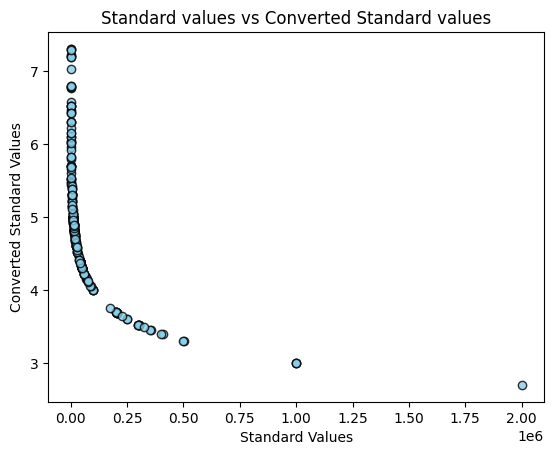

In [60]:
plt.scatter(df_combined['standard_value'], df_final['pIC50'], c='skyblue', edgecolors='black', alpha=0.8)
plt.title("Standard values vs Converted Standard values")
plt.ylabel("Converted Standard Values")
plt.xlabel("Standard Values")
plt.show()

#### Removing 'intermediate' bioactivity class

In [62]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumADonors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,328.466,3.34562,1.0,5.0,6.419999
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,6.782516
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,485.559,0.54470,5.0,7.0,6.793174
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,222.379,-1.99300,1.0,3.0,6.779997


#### Chemical Space Analysis (EDA for chemistry) via Lipinski descriptors

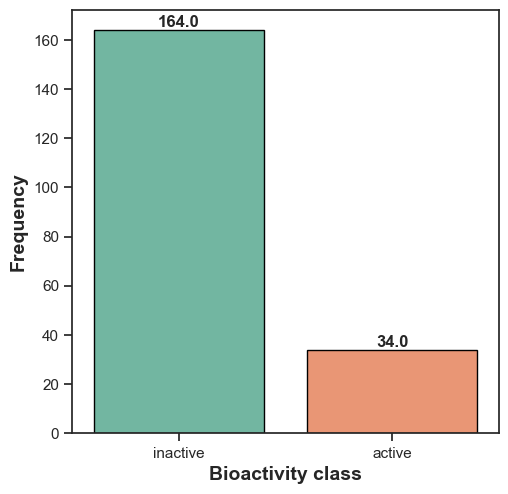

In [73]:
# Frequency plot of the 2 bioactivity classes

plt.figure(figsize = (5.5, 5.5))

ax = sns.countplot(x = 'bioactivity_class', data = df_2class, edgecolor = 'black', palette='Set2', hue = 'bioactivity_class', legend = False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

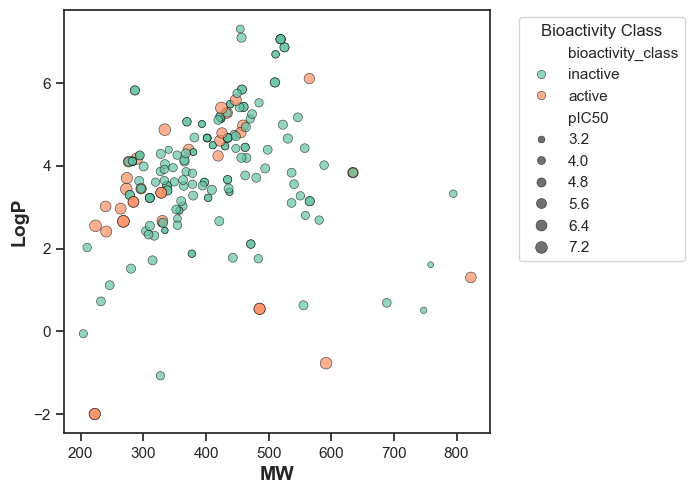

In [82]:
# Scatter plot of MW vs LogP

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(
    x='MW', 
    y='LogP', 
    data=df_2class, 
    hue='bioactivity_class',
    size = 'pIC50',
    palette='Set2', 
    alpha=0.7,  
    edgecolor='black'  
)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(title="Bioactivity Class", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


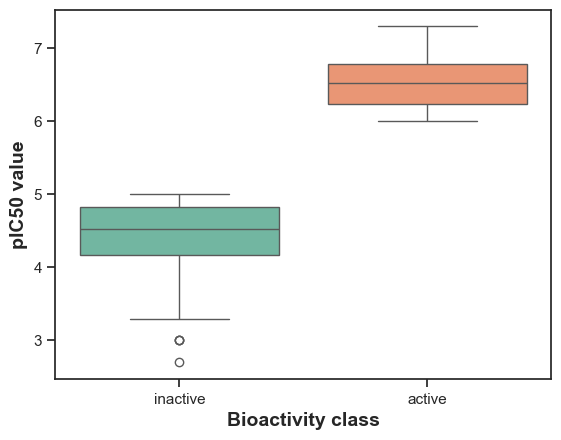

In [ ]:
# Box Plot for pIC50

sns.boxplot(
    x='bioactivity_class', 
    y='pIC50', 
    data=df_2class, 
    hue='bioactivity_class', 
    palette='Set2'
)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.show()

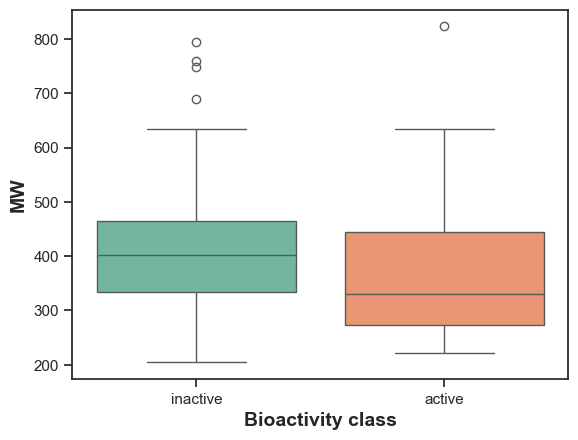

In [106]:
# Box Plot for MW

sns.boxplot(
    x='bioactivity_class', 
    y='MW', 
    data=df_2class, 
    hue='bioactivity_class', 
    palette='Set2'
)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.show()

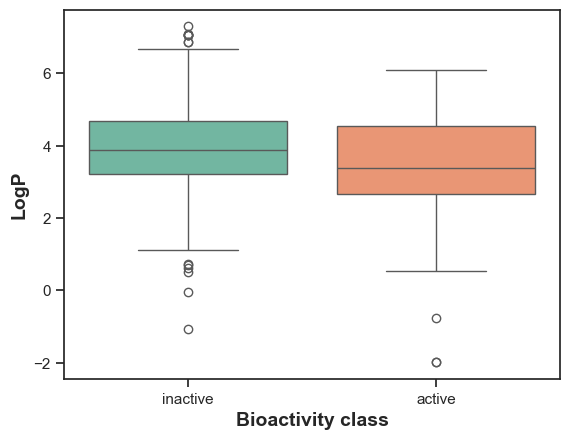

In [107]:
# Box Plot for pIC50

sns.boxplot(
    x='bioactivity_class', 
    y='LogP', 
    data=df_2class, 
    hue='bioactivity_class', 
    palette='Set2'
)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.show()

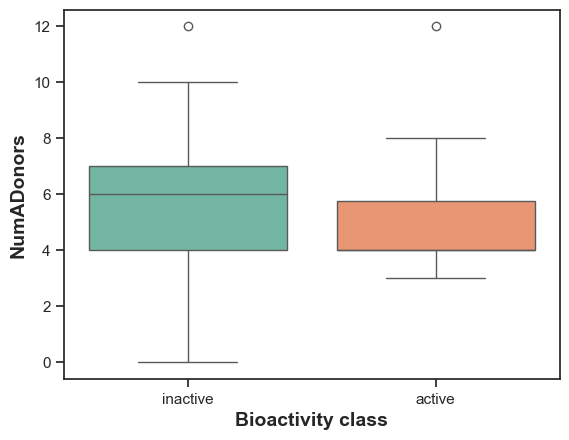

In [108]:
# Box Plot for pIC50

sns.boxplot(
    x='bioactivity_class', 
    y='NumADonors', 
    data=df_2class, 
    hue='bioactivity_class', 
    palette='Set2'
)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumADonors', fontsize=14, fontweight='bold')

plt.show()

#### Statistical Analysis with Mann-Whitney U Test
> Idea is to look at the difference between the two bioactivity class

In [104]:
def mannwhitney(descriptor, df, case = 'coronavirus'):
    
    np.random.seed(1)

    selection = [descriptor, 'bioactivity_class']
    df_local = df[selection]
    active = df_local[df_local['bioactivity_class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df_local = df[selection]
    inactive = df_local[df_local['bioactivity_class'] == 'inactive']
    inactive = inactive[descriptor]

    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics = %.3f, p = %.5f' % (stat, p))

    # H0: the two distributions about bioactivity classes are the same
    alpha = 0.05
    if p > alpha:
        interpretation = "Same distribution (fail to reject H0)"
    else:
        interpretation = "Different distribution (can't accept H0)"

    results = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'Interpretation': interpretation
    }, index = [0])
    filename = 'mannwhitneyu_' + case + '_' + descriptor + '.csv'
    results.to_csv('data/CHEMBL_Bioactivity_Data/' + filename, index=False)

    return results

In [105]:
mannwhitney('pIC50', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5576.0,4.760913e-20,0.05,Different distribution (can't accept H0)


In [110]:
mannwhitney('MW', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1996.5,0.009286,0.05,Different distribution (can't accept H0)


In [111]:
mannwhitney('LogP', df_2class)

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2222.5,0.063155,0.05,Same distribution (fail to reject H0)


### Alzherimer case

In [131]:
df_4_alzh = pd.read_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer_preprocessed.csv")

#### Lipinski descriptors
> Drug Likeness of the compounds based on the Absorption, Distribution, Metabolism and Excretion (ADME)

Lipinski's rule or Rule-of-Five:
- Molecular weight < 500 Dalton
- Octanol-water partion coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [132]:
# Calculate descriptors

# Calculate descriptors

def lipinski(smiles, verbose = False):

    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([
            desc_MolWt,
            desc_MolLogP,
            desc_NumHDonors,
            desc_NumHAcceptors
        ])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i += 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [133]:
df_lipinski_alzh = lipinski(df_4_alzh['canonical_smiles'])
df_lipinski_alzh

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.3188,1.0,2.0
1,299.461,3.2412,1.0,3.0
2,311.422,3.3188,1.0,2.0
3,327.877,3.8331,1.0,2.0
4,372.328,3.9422,1.0,2.0
...,...,...,...,...
1493,341.407,3.0735,1.0,5.0
1494,327.380,2.7705,2.0,5.0
1495,324.356,2.7788,2.0,4.0
1496,276.288,1.3541,1.0,5.0


In [134]:
# Combine data frame preprocessed with Lipinski df

df_combined_alzh = pd.concat([df_4_alzh, df_lipinski_alzh], axis=1)
df_combined_alzh.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0,311.422,3.3188,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0,299.461,3.2412,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0,311.422,3.3188,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0,327.877,3.8331,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0,372.328,3.9422,1.0,2.0


#### Convert IC50 to pIC50
> In order to make the distribution more even (uniform)

It essencially applies a negative logarithmic scale to standard_value column after a multiplication by 10<sup>-9</sup>

In [234]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:   
        if i < 0:
            pIC50.append(np.nan)      
        else:   
            molar = i*(10**-9) #converts nM to M
            pIC50.append(-np.log10(molar))
    
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

In [235]:
df_combined_alzh.standard_value.describe()

count    1.498000e+03
mean     2.214190e+04
std      7.764479e+04
min     -5.000000e+00
25%      3.800000e+02
50%      5.000000e+03
75%      1.766000e+04
max      1.655000e+06
Name: standard_value, dtype: float64

In [236]:
# we need to cap the maximum values, values greater than 100000000 has negative values after the log10

-np.log10((10**-9)*100000000), -np.log10((10**-9)*10000000000)

(np.float64(1.0), np.float64(-1.0))

In [237]:
def norm_value(input):  

    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

In [238]:
df_norm_alzh = norm_value(df_combined_alzh)
df_norm_alzh.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,10000.0


In [239]:
df_norm_alzh.standard_value_norm.describe()

count    1.498000e+03
mean     2.214190e+04
std      7.764479e+04
min     -5.000000e+00
25%      3.800000e+02
50%      5.000000e+03
75%      1.766000e+04
max      1.655000e+06
Name: standard_value_norm, dtype: float64

In [240]:
df_final_alzh = pIC50(df_norm_alzh)
df_final_alzh.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000


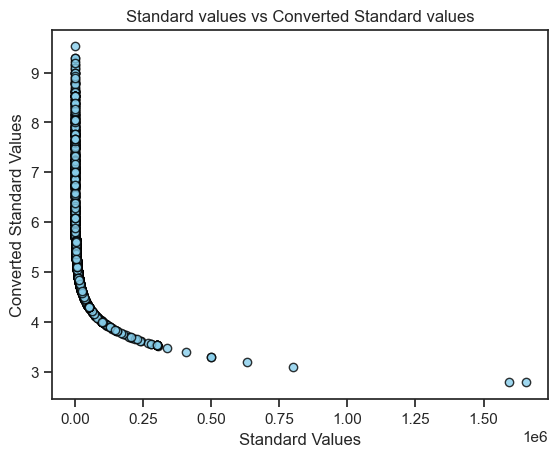

In [241]:
plt.scatter(df_combined_alzh['standard_value'], df_final_alzh['pIC50'], c='skyblue', edgecolors='black', alpha=0.8)
plt.title("Standard values vs Converted Standard values")
plt.ylabel("Converted Standard Values")
plt.xlabel("Standard Values")
plt.show()

#### Removing 'intermediate' bioactivity class

In [242]:
df_2class_alzh = df_final_alzh[df_final_alzh['bioactivity_class'] != 'intermediate']
df_2class_alzh

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1493,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
1494,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
1495,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030
1496,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,inactive,276.288,1.3541,1.0,5.0,4.575118


#### Chemical Space Analysis (EDA for chemistry) via Lipinski descriptors

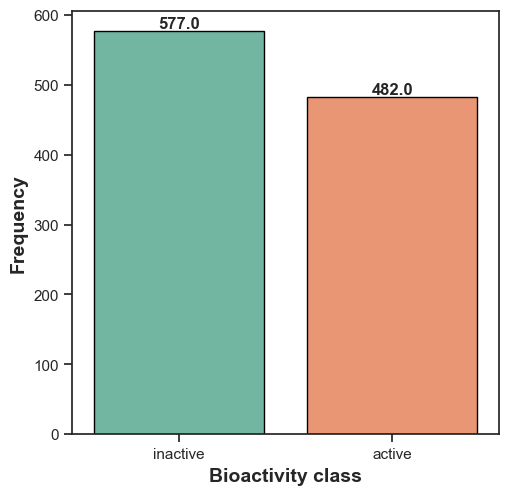

In [243]:
# Frequency plot of the 2 bioactivity classes

plt.figure(figsize = (5.5, 5.5))

ax = sns.countplot(x = 'bioactivity_class', data = df_2class_alzh, edgecolor = 'black', palette='Set2', hue = 'bioactivity_class', legend = False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

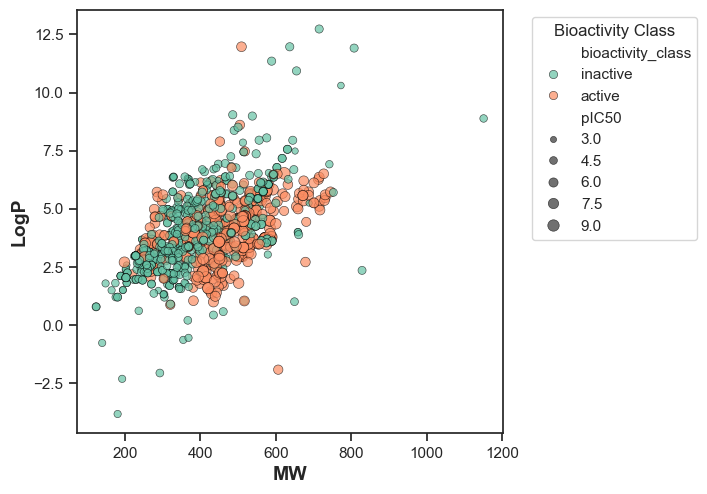

In [244]:
# Scatter plot of MW vs LogP

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(
    x='MW', 
    y='LogP', 
    data=df_2class_alzh, 
    hue='bioactivity_class', 
    size = 'pIC50', 
    palette='Set2', 
    alpha=0.7,  
    edgecolor='black'  
)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(title="Bioactivity Class", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


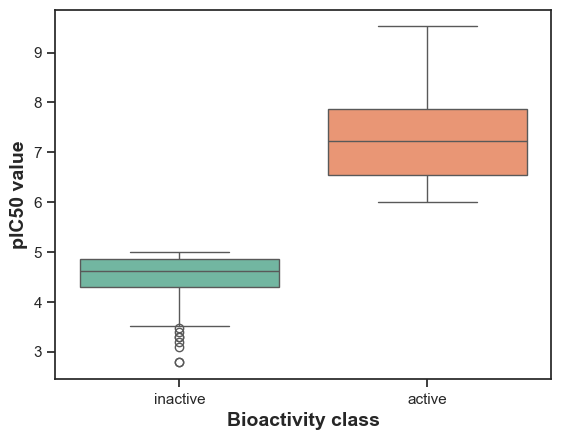

In [245]:
# Box Plot for pIC50

sns.boxplot(
    x='bioactivity_class', 
    y='pIC50', 
    data=df_2class_alzh, 
    hue='bioactivity_class', 
    palette='Set2'
)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.show()

#### Statistical Analysis with Mann-Whitney U Test
> Idea is to look at the difference between the two bioactivity class

In [248]:
def mannwhitney(descriptor, df, case = 'coronavirus'):
    
    np.random.seed(1)

    df_local = df[[descriptor, 'bioactivity_class']].dropna()

    df_local['bioactivity_class'] = df_local['bioactivity_class'].astype(str).str.strip().str.lower()

    active = df_local[df_local['bioactivity_class'] == 'active'][descriptor]
    inactive = df_local[df_local['bioactivity_class'] == 'inactive'][descriptor]

    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics = %.3f, p = %.5f' % (stat, p))

    # H0: the two distributions about bioactivity classes are the same
    alpha = 0.05
    if p > alpha:
        interpretation = "Same distribution (fail to reject H0)"
    else:
        interpretation = "Different distribution (can't accept H0)"

    results = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'Interpretation': interpretation
    }, index = [0])
    filename = 'mannwhitneyu_' + case + '_' + descriptor + '.csv'
    results.to_csv('data/CHEMBL_Bioactivity_Data/' + filename, index=False)

    return results

In [249]:
mannwhitney('pIC50', df_2class_alzh, case = 'alzheimer')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,276960.0,7.507150e-173,0.05,Different distribution (can't accept H0)


In [250]:
mannwhitney('MW', df_2class_alzh, case = 'alzheimer')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,185621.0,5.746089e-21,0.05,Different distribution (can't accept H0)


In [251]:
mannwhitney('LogP', df_2class_alzh, case = 'alzheimer')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,152523.5,0.00659,0.05,Different distribution (can't accept H0)


In [252]:
mannwhitney('NumHDonors', df_2class_alzh, case = 'alzheimer')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,113400.0,7.957751e-08,0.05,Different distribution (can't accept H0)


In [253]:
mannwhitney('NumHAcceptors', df_2class_alzh, case = 'alzheimer')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,176065.0,3.478651e-14,0.05,Different distribution (can't accept H0)


## Regression and Random Forest models
> Apply machine learning models using ChEMBL bioactivity data (acetylcholineserase inhibitors)

### Import Libraries

In [54]:
import lazypredict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor 

### Download and Load Dataset

In [11]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv -P data/CHEMBL_Bioactivity_Data/

--2025-02-03 15:44:17--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8,0M) [text/plain]
Saving to: ‘data/CHEMBL_Bioactivity_Data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

acetylcholinesteras 100%[===================>]   7,98M  16,4MB/s    in 0,5s    

2025-02-03 15:44:18 (16,4 MB/s) - ‘data/CHEMBL_Bioactivity_Data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [8363909/8363909]



In [13]:
df_acetyl = pd.read_csv("data/CHEMBL_Bioactivity_Data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

df_acetyl.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.096910


In [15]:
df_acetyl.describe().T

,count,mean,std,min,25%,50%,75%,max
PubchemFP0,4695.0,0.999787,0.014594,0.0,1.000000,1.00000,1.00000,1.000000
PubchemFP1,4695.0,0.993610,0.079689,0.0,1.000000,1.00000,1.00000,1.000000
PubchemFP2,4695.0,0.897551,0.303271,0.0,1.000000,1.00000,1.00000,1.000000
PubchemFP3,4695.0,0.286901,0.452363,0.0,0.000000,0.00000,1.00000,1.000000
PubchemFP4,4695.0,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...
PubchemFP877,4695.0,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000
PubchemFP878,4695.0,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000
PubchemFP879,4695.0,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000
PubchemFP880,4695.0,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000


### Data Preparation

In [ ]:
# Input features
# Each molecule has compounds that are active (1) and inactive (0), 
# we need to understand which funciotional group are essential to design a good drug using our model

X = df_acetyl.drop(columns=['pIC50'], axis=1)
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


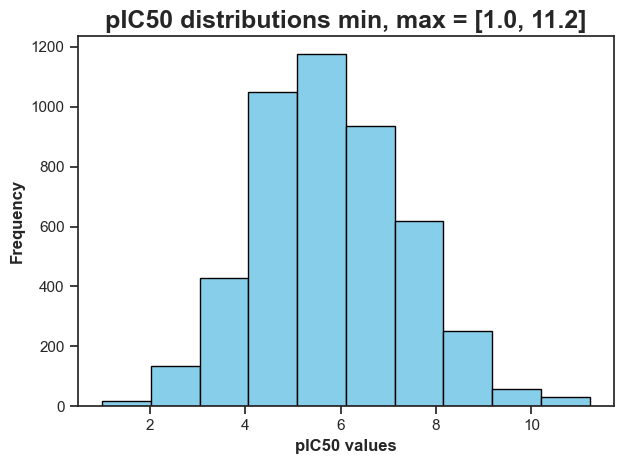

In [31]:
y = df_acetyl['pIC50']

plt.hist(y, color='skyblue', edgecolor = 'black')
plt.title(f"pIC50 distributions min, max = [{np.min(y)}, {np.max(y).round(1)}]", fontsize = 18, fontweight = 'bold')
plt.xlabel("pIC50 values", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.tight_layout()
plt.show()

In [36]:
# Remove low variance features

selection = VarianceThreshold(threshold = (0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [37]:
# Data split

np.random.seed(1)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((3756, 137), (939, 137))

###  Building a Regression Model using Random Forest

In [46]:
np.random.seed(1)
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
r2 = model_rf.score(X_test, y_test)
print(f"R^2 using Random Forest: {np.round(r2, 2)}")

R^2 using Random Forest: 0.52


In [47]:
y_pred = model_rf.predict(X_test)

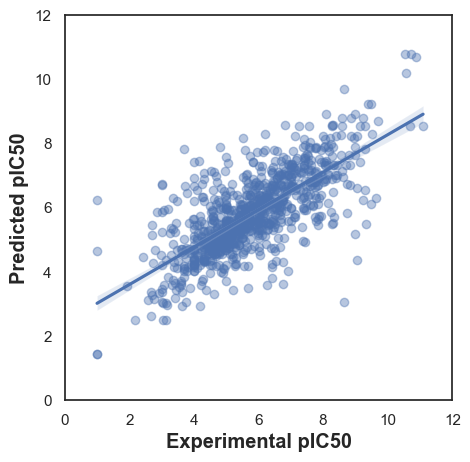

In [51]:
sns.set_theme(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'alpha' : 0.4})
ax.set_xlabel("Experimental pIC50", fontsize = 'large', fontweight = 'bold')
ax.set_ylabel("Predicted pIC50", fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show()

### Compare machine learning models

In [ ]:
np.random.seed(1)
clf = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
train, test = clf.fit(X_train, X_test, y_train, y_test)

 10%|▉         | 4/42 [00:00<00:06,  6.29it/s]/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8568488977580273, tolerance: 0.723114807272361
  model = cd_fast.enet_coordinate_descent_gram(
/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0431676336884266, tolerance: 0.723114807272361
  model = cd_fast.enet_coordinate_descent_gram(
/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.832184


/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
100%|██████████| 42/42 [00:21<00:00,  1.98it/s]


In [56]:
# Visualize results table on train

train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.44,0.52,1.07,2.77
HistGradientBoostingRegressor,0.43,0.52,1.08,1.00
LGBMRegressor,0.43,0.51,1.08,0.46
BaggingRegressor,0.41,0.49,1.10,0.29
KNeighborsRegressor,0.38,0.47,1.13,0.05
MLPRegressor,0.37,0.46,1.14,1.56
SVR,0.35,0.45,1.15,0.94
NuSVR,0.35,0.44,1.16,0.70
GradientBoostingRegressor,0.25,0.36,1.24,0.98


In [57]:
# Visualize results table on test

test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.44,0.52,1.07,2.77
HistGradientBoostingRegressor,0.43,0.52,1.08,1.00
LGBMRegressor,0.43,0.51,1.08,0.46
BaggingRegressor,0.41,0.49,1.10,0.29
KNeighborsRegressor,0.38,0.47,1.13,0.05
MLPRegressor,0.37,0.46,1.14,1.56
SVR,0.35,0.45,1.15,0.94
NuSVR,0.35,0.44,1.16,0.70
GradientBoostingRegressor,0.25,0.36,1.24,0.98


### Data Visualization of model performance

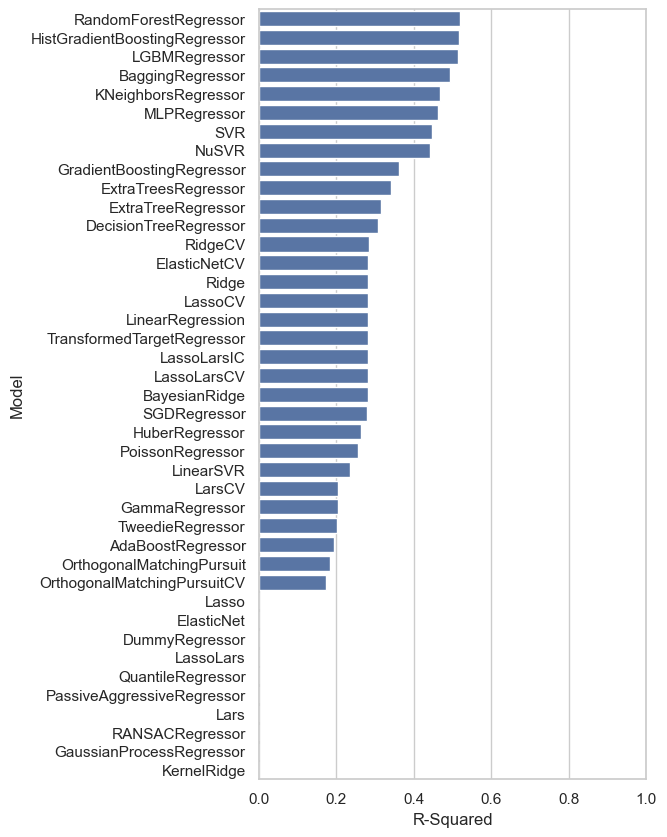

In [63]:
plt.figure(figsize=(5,10))

sns.set_theme(style='whitegrid')
ax = sns.barplot(y = train.index, x = "R-Squared", data = train)
ax.set(xlim = (0,1))
plt.show()

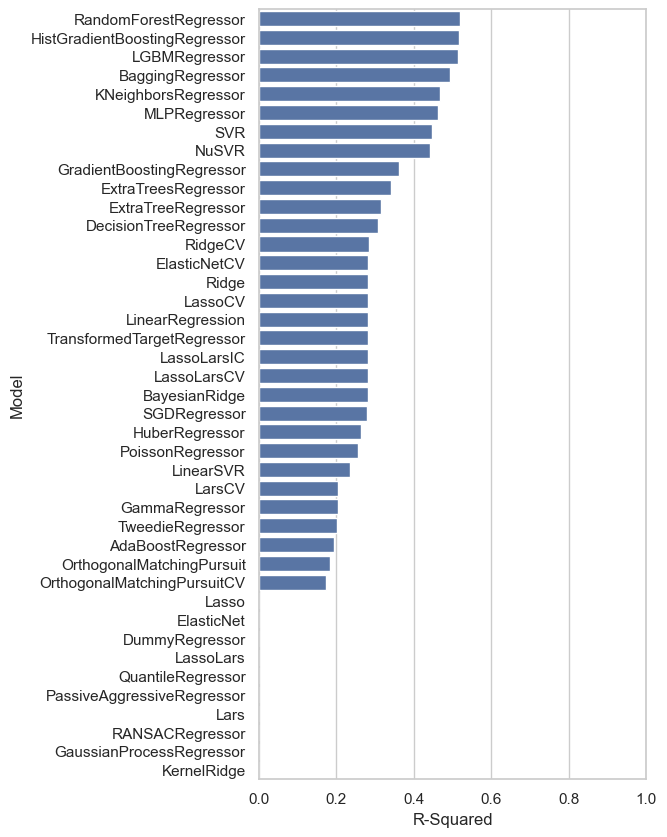

In [ ]:
plt.figure(figsize=(5,10))

sns.set_theme(style='whitegrid')
ax = sns.barplot(y = test.index, x = "R-Squared", data = test)
ax.set(xlim = (0,1))
plt.show()

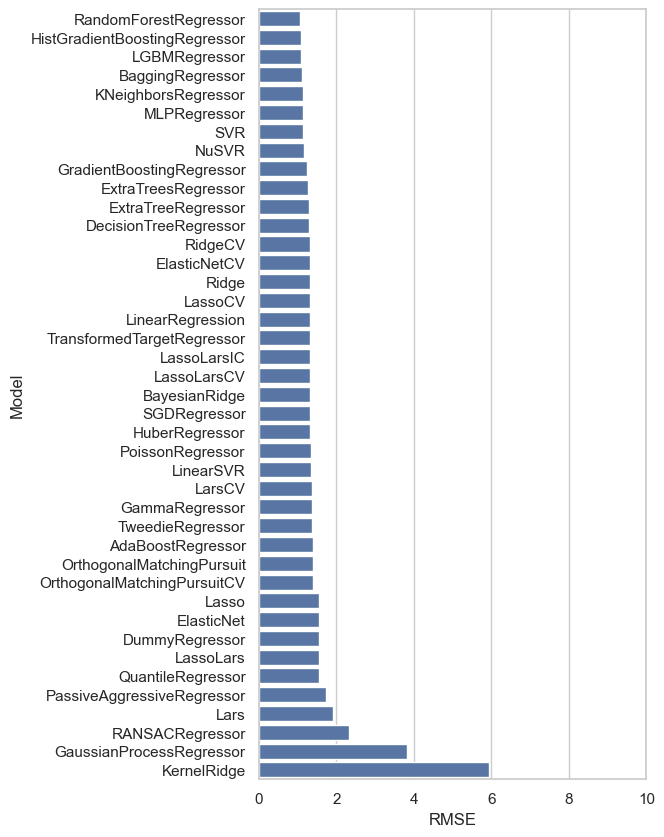

In [64]:
plt.figure(figsize=(5,10))

sns.set_theme(style='whitegrid')
ax = sns.barplot(y = train.index, x = "RMSE", data = train)
ax.set(xlim = (0,10))
plt.show()

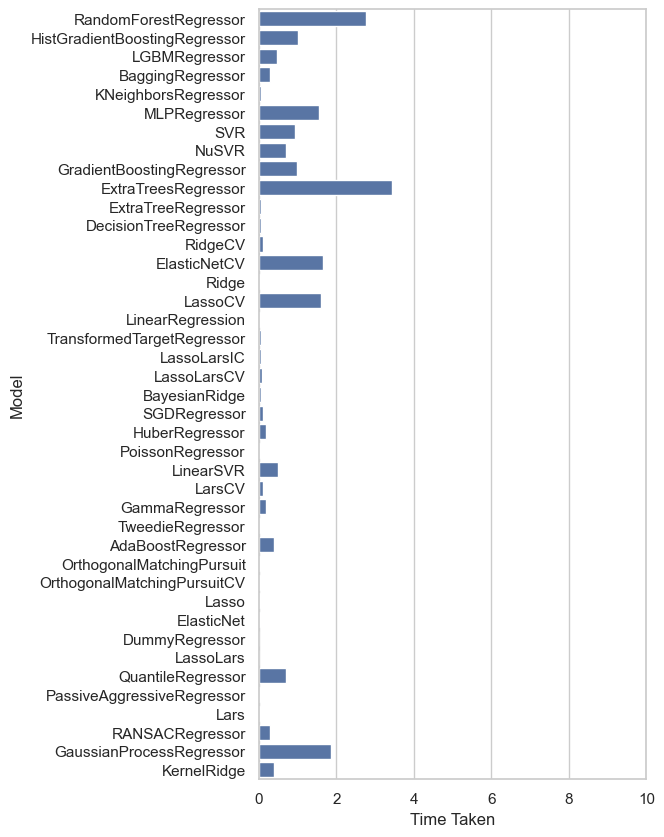

In [65]:
plt.figure(figsize=(5,10))

sns.set_theme(style='whitegrid')
ax = sns.barplot(y = train.index, x = "Time Taken", data = train)
ax.set(xlim = (0,10))
plt.show()